# Exploration: NumPy and Pandas

A fundamental component of mastering data science concepts is applying and practicing them. This exploratory notebook is designed to provide you with a semi-directed space to do just that with the Python, NumPy, and pandas skills that you either covered in an in-person workshop or through Microsoft Learn. The specific examples in this notebook apply NumPy and pandas concepts in a life-sciences context, but they are applicable across disciplines and industry verticals.

This notebook is divided into different stages of exploration. Initial suggestions for exploration are more structured than later ones and can provide some additional concepts and skills for tackling data-science challenges with real-world data. However, this notebook is designed to provide you with a launchpad for your personal experimentation with data science, so feel free to add cells and running your own experiments beyond those suggested here. That is the power and the purpose of a platform like Jupyter notebooks!

## Setup and Refresher on Notebooks

Before we begin, you will need to important the principal libraries used to explore and manipulate data in Python: NumPy and pandas. The cell below also imports Matplotlib, the main visualization library in Python. For simplicity and consistency with prior instruction, industry-standard aliases are applied to these imported libraries. The cell below also runs `%matplotlib inline` magic command, which instructs Jupyter to display Matplotlib output directly in the notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

As it might have been a while since you last worked with Jupyter notebooks, here is a quick refresher on efficiently using them.

### Notebook Cells

Notebook cells are divided into Markdown text cells and interactive code cells. You can easily recognize code cells by the `[-]:` to the left of them.

Code in a code cells has only been executed -- and is thus available for use in other code cells in the notebook -- if there is a number beside the code cell (for example, `[1]:`).

To run the code in a cell, you can click the **Run** icon at the top left of a code cell or press **`Ctrl` + `Enter`**.

### Instructor's Note

Open-ended questions for students and groups in this notebook are followed by italicized explanations in your copy of this notebook to more easily help you guide group discussions or answer student questions.

### Documentation and Help

Documentation for Python objects and functions is available directly in Jupyter notebooks. In order to access the documentation, simply put a question mark in front of the object or function in a code cell and execute the cell (for example, `?print`). A window containing the documentation will then open at the bottom of the notebook.

On to exploration!

## Section 1: Guided Exploration

For this workshop, you will step into the role of a data scientist helping researchers examine a new dataset of genetic information. The dataset is entitled `genome.txt`. It contains close to 1 million single-nucleotide polymorphisms (SNPs) from build 36 of the human genome. SNPs are variations of a single nucleotide that occurs at specific positions in a genome and thus serve as useful sign posts for pinpointing susceptibility to diseases and other genetic conditions. As a result, they are particularly useful in the field of bioinformatics.

This particular set of SNPs was originally generated by the genomics company 23andME in February 2011 and is drawn from the National Center for Biotechnology Information within the United States National Institutes of Health and is used here as data in the public domain.

### Import and Investigate the Data

Recall that `pd.read_csv()` is the most common way to pull external data into a pandas DataFrame. Despite its name, this function works on a variety of file formats containing delimited data. Go ahead and try it on `genome.txt`.

(If you need a refresher on the syntax for using this function, refer back to the Reactor pandas materials, to the build-in Jupyter documentation with `?pd.read_csv`, or to the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).)

In [2]:
# Import the data from genome.txt into a DataFrame.
genome = pd.read_csv('Data/genome.txt')
genome.head()

,rsid chromosome position genotype
0,rs4477212\t1\t72017\tAA
1,rs3094315\t1\t742429\tAA
2,rs3131972\t1\t742584\tGG
3,rs12124819\t1\t766409\tAA
4,rs11240777\t1\t788822\tAG


The \t indicate that the data in this text file is delimited by tabs. Try re-importing this data and this time specify the separator to use.

In [3]:
# Import the data from genome.txt into a DataFrame and specify the separator.
genome = pd.read_csv('Data/genome.txt', sep='\t')
genome.head()

,rsid,chromosome,position,genotype
0,rs4477212,1,72017,AA
1,rs3094315,1,742429,AA
2,rs3131972,1,742584,GG
3,rs12124819,1,766409,AA
4,rs11240777,1,788822,AG


Is the DataFrame now in a more useful form? If so, what initial information can gather about the dataset, such as its features or number of observations? (The [`head()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [`info()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) methods are some of the tools that you can use for your preliminary investigation of the dataset.)
 - *The dataset has 966,977 rows and four columns, none of which have missing values. One column (position) has numeric data while the other columns have string data.*

In [4]:
# Use the info() method to print a concise summary of the genome DataFrame.
genome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966977 entries, 0 to 966976
Data columns (total 4 columns):
rsid          966977 non-null object
chromosome    966977 non-null object
position      966977 non-null int64
genotype      966977 non-null object
dtypes: int64(1), object(3)
memory usage: 29.5+ MB


### Interpreting the Dataset

**`rsid`** is short for Reference SNP cluster ID; it is the identification number used by researchers and in databases to refer to specific SNPs. (For more information, see the [23andMe](https://customercare.23andme.com/hc/en-us/articles/212196908-What-Are-RS-Numbers-Rsid-) reference page on RS numbers.

**`chromosome`** refers to which of the 23 human chromosomes (22 numbered and one X or Y chromosome) or the mitochondrial chromosoe on which an SNP appears.

**`position`** refers to the specific location of a given SNP on the reference human genome. (For more information on the reference human genome, see the [human genome overview page](https://www.ncbi.nlm.nih.gov/grc/human) on the Genome Reference Consortium web site.) 

**`genotype`** refers to the pair of nucleotides that form an SNP inherited at a given chromosomal position (one coming from the father and one coming from the mother). (For more information on genotypes -- as well as a list of notable genotypes -- visit the [genotype page](https://www.snpedia.com/index.php/Genotype) at SNPedia.)

## Section 2: Intermediate Exploration

Now that you know more about the dataset, the next step is to start asking questions of it. A common next attribute of this particular dataset to investigate is how many SNPs occur per chromosome. Use the `value_counts()` method to determine this.

(**Note:** You might also find it helpful to refer back to the Reactors pandas material to work through this section.)

In [5]:
# Use the value_counts() method to find the counts of unique values in the chromosome column.
genome['chromosome'].value_counts()

2     77691
1     77230
6     63604
3     63523
5     56269
4     55302
7     51291
10    50516
8     49422
11    48121
12    47334
9     43147
13    36210
14    30921
16    30293
15    28530
18    28060
17    26898
X     26087
20    23923
19    18670
22    14245
21    10549
Y      3483
21     2921
MT     2737
Name: chromosome, dtype: int64

Numbers are good for precision, but often a visualization can provide a more succinct (and digestible) presentation of data. The `plot()` method is a convenient way to invoke Matplotlib directly from your DataFrame. Use the `plot()` method to creat a bar chart of of the SNP value counts per chromosome. (**Hint:** You can do this either by specifying the `kind` argument in the `plot()` method or by using the `plot.bar()` method.)

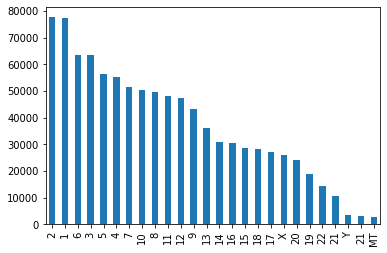

In [6]:
# Plot the value counts for the unique values in the chromosome column.
genome['chromosome'].value_counts().plot(kind='bar');

The `value_counts()` method automatically sorts the chromosomes highest occurrence of SNPs to the lowest. However, because we are exploring data related to the different chromosomes, viewing the data sorted by the order in which chromosomes appear in the dataset can be more useful the researchers you are helping. Try to see if you can figure out how to do so. (The `sort_index()` method is one possibility. Another possibility gets raised in the comments in this Stack Overflow [article](https://stackoverflow.com/questions/43855474/changing-sort-in-value-counts).)

In [7]:
# Print the value counts for the unique values in the chromosome column in the order in which they occur.
genome['chromosome'].value_counts()[genome['chromosome'].unique()]

1     77230
2     77691
3     63523
4     55302
5     56269
6     63604
7     51291
8     49422
9     43147
10    50516
11    48121
12    47334
13    36210
14    30921
15    28530
16    30293
17    26898
18    28060
19    18670
20    23923
21    10549
21     2921
22    14245
X     26087
Y      3483
MT     2737
Name: chromosome, dtype: int64

Now try plotting this output. (One of the joys of pandas is that you can continue to string methods to objects in order to generate powerful, compact code.)

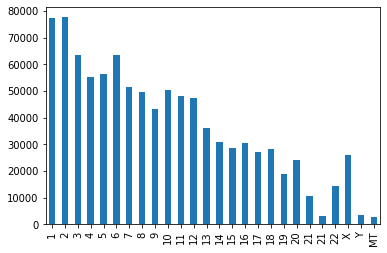

In [8]:
# Plot the value counts for the unique values in the chromosome column in the order in which they occur.
genome['chromosome'].value_counts()[genome['chromosome'].unique()].plot(kind='bar');

### Grouping Data

Thus far we have only looked at one column of the DataFrame, `chomosome`. However, pandas provides tools to quickly examine more of the DataFrame at once. If you haven't tried it already, the `groupby()` method can be useful in situations like this to turn the values of one of the columns in a DataFrame into the index for the DataFrame. Try using that method using the `chromosome` column coupled with the `count()` method.

In [9]:
# Use the groupby() and count() methods to create a DataFrame of grouped values.
genome.groupby('chromosome').count()

,rsid,position,genotype
chromosome,,,
1,77230,77230,77230
2,77691,77691,77691
3,63523,63523,63523
4,55302,55302,55302
5,56269,56269,56269
6,63604,63604,63604
7,51291,51291,51291
8,49422,49422,49422
9,43147,43147,43147


You can also plot your now-grouped DataFrame. (**Note:** Your bar graph might not turn out the way you expected. If so, discuss with your partner or group what might solve this problem.)
 - *If you do not specify a column within the grouped DataFrame to plot, Python will plot all three columns for each chomosome.*

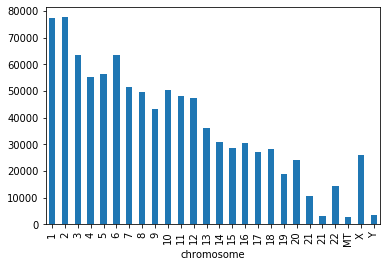

In [10]:
# Plot the unique genotype counts from the grouped chromosome DataFrame.
genome.groupby('chromosome')['genotype'].count().plot(kind='bar');

Changing what you group by is another means of asking questions about your data. Now try grouping by `genotype`. What does this new grouping tell you?
 - *The SNPs in this dataset appear most frequenly on certain genotypes.*

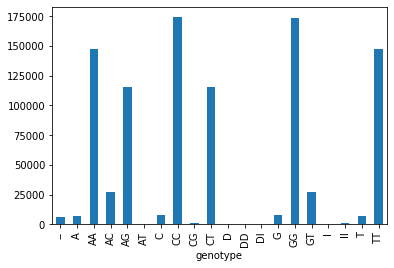

In [11]:
# Plot the unique chromosome counts from the grouped genotype DataFrame.
genome.groupby('genotype')['chromosome'].count().plot.bar();

**Note:** The **D** and **DD** are not nucleotides themselves; DNA nucleotides can only be adenine (A), thymine (T), guanine (G) and cytosine (C). Rather, the **D** stands for genotypes in which in which one or more base pairs (or even an entire part of a chromosome) has been **deleted** during DNA replication.

Similarly, **I** and **II** represent genotypes of [wobble base pairs](https://en.wikipedia.org/wiki/Wobble_base_pair) that do not do not follow the conventional A-T and C-G pairing in DNA. Such genotypes are responsible for ailments such as [sickle-cell disease](https://en.wikipedia.org/wiki/Sickle_cell_disease).

### Pivoting Data

You can summarize your DataFrame in a fashion similar to pivot tables in spreadsheets by use of the [`pivot()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot.html) function. Try using this function on your grouped data, but be advised that the `index`, `columns`, and `values` arguments for this function all require `str` or `object` inputs, so it might be easiest to first capture the output from the `groupby()` in a new DataFrame. (This Stack Overflow [answer](https://stackoverflow.com/questions/10373660/converting-a-pandas-groupby-output-from-series-to-dataframe) given by Wes McKinney, the creator of pandas, might prove useful in doing this.)

In [12]:
# Created a DataFrame by grouping the genome data by both genotype and chromosome.
grouped_genome = genome.groupby(['genotype', 'chromosome'])['rsid'].count().reset_index()

# Rename the rsid column to count as this is the role that this column will fill in this new DataFrame.
grouped_genome.rename(columns={'rsid': 'count'}, inplace=True)
grouped_genome.head()

,genotype,chromosome,count
0,--,1,398
1,--,2,331
2,--,3,253
3,--,4,283
4,--,5,243


In [13]:
# Create a pivoted DataFrame with genotype as the index, chromosome as the columns, and count as the values.
pivot_genome = grouped_genome.pivot(index='genotype', 
                                    columns='chromosome', 
                                    values='count')
pivot_genome.head()

chromosome,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,21,22,MT,X,Y
genotype,,,,,,,,,,,,,,,,,,,,,
--,398.0,331.0,253.0,283.0,243.0,358.0,327.0,204.0,162.0,243.0,...,195.0,102.0,152.0,106.0,63.0,17.0,125.0,152.0,237.0,1286.0
A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,760.0,5957.0,510.0
AA,12064.0,12328.0,10158.0,8908.0,8952.0,10078.0,7862.0,7845.0,6817.0,7882.0,...,4064.0,4482.0,2666.0,3784.0,1675.0,378.0,2062.0,NaN,78.0,NaN
AC,2101.0,2266.0,1903.0,1630.0,1684.0,1726.0,1444.0,1572.0,1309.0,1456.0,...,732.0,811.0,461.0,619.0,322.0,107.0,349.0,NaN,12.0,NaN
AG,9114.0,9872.0,8027.0,7004.0,7175.0,7716.0,6388.0,6350.0,5264.0,6144.0,...,3244.0,3483.0,2278.0,2912.0,1264.0,418.0,1752.0,NaN,46.0,NaN


### Stacked Bar Graph

With the data pivoted, you can try somewhat more advanced visualization of your data such as a stacked bar graph in which you can see not just how many instances of different genotypes there are in the dataset, but also how many of those instances occur on each chromosome. This can be useful to helping your researchers understand the dataset in that they are not only interested in the number of genotype occurences, but also on which chromosomes they occur. Build upon what you know about visualiziing with Matplotlib and refer to the documentation for more hints about how to execute this.

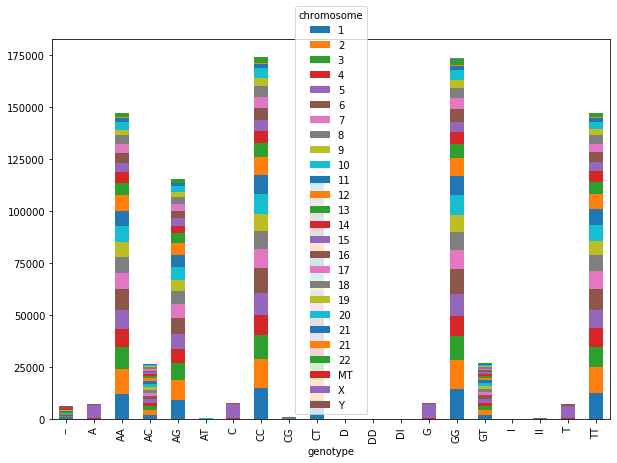

In [14]:
# Plot the pivoted DataFrame to create a stacked barchart.
pivot_genome.plot.bar(stacked=True, figsize=(10,7));

In [15]:
# Access the documentation for the bar function from within Jupyter.
?pivot_genome.plot.bar

Signature: pivot_genome.plot.bar(x=None, y=None, **kwds)
Docstring:
Vertical bar plot.

A bar plot is a plot that presents categorical data with
rectangular bars with lengths proportional to the values that they
represent. A bar plot shows comparisons among discrete categories. One
axis of the plot shows the specific categories being compared, and the
other axis represents a measured value.

Parameters
----------
x : label or position, optional
    Allows plotting of one column versus another. If not specified,
    the index of the DataFrame is used.
y : label or position, optional
    Allows plotting of one column versus another. If not specified,
    all numerical columns are used.
**kwds
    Additional keyword arguments are documented in
    :meth:`pandas.DataFrame.plot`.

Returns
-------
axes : matplotlib.axes.Axes or np.ndarray of them
    An ndarray is returned with one :class:`matplotlib.axes.Axes`
    per column when ``subplots=True``.

See Also
--------
pandas.DataFrame.plot.b

## Section 3: Individual Exploration

There is still a lot you can do with this dataset or related ones. Ideas include:
 - Moving the legend for the stacked bar graph off to one side. This will make the visualization easier to read and more useful to the researchers.


<Figure size 432x288 with 0 Axes>

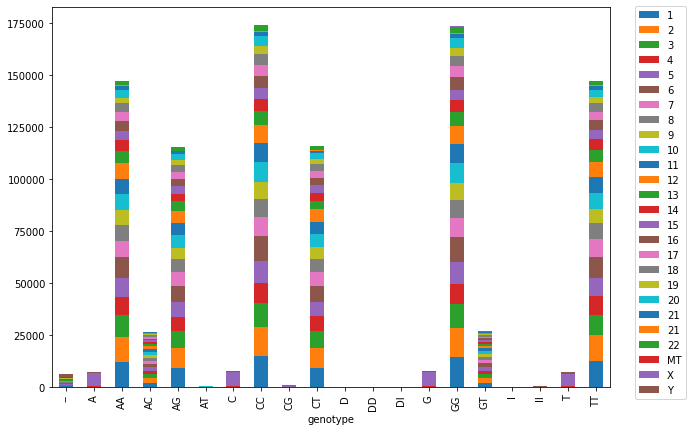

In [16]:
# Students can play with settings like bbox_to_anchor to arrive at an appearance they like.
fig = plt.figure()

# Create an Axis class object for the stacked barchart.
ax = pivot_genome.plot.bar(stacked=True, figsize=(10,7))

# Specify values for the loc and bbox_to_anchor paramaters of the legend() method in order to render the legend to the side.
ax.legend(loc='upper center', bbox_to_anchor=(1.09, 1.014), ncol=1)
plt.show();

 - Researching the average number of base pairs per human chromosome to see (and visualize) what proportion of each chromosome is represented in this dataset. Comparisons of this sort can help researchers quickly see what is out of the ordinary in a dataset such as this one.

In [17]:
# Create a new DataFrame to house the aggregated genotype totals by chromosome.
chrom_num = genome.groupby('chromosome')['genotype'].count().reset_index()
chrom_num.tail(10)

,chromosome,genotype
16,17,26898
17,18,28060
18,19,18670
19,20,23923
20,21,10549
21,21,2921
22,22,14245
23,MT,2737
24,X,26087
25,Y,3483


In [18]:
# It is subtle, but there are actually two rows for Chromosome 21.
# Combine the genotype totals for both rows and delete the surplus row.
chrom_num.iloc[20, 1] = chrom_num.iloc[20, 1] + chrom_num.iloc[21, 1]
chrom_num.drop([21], axis=0, inplace=True)
chrom_num.reset_index(inplace=True, drop=True)
chrom_num.tail(10)

,chromosome,genotype
15,16,30293
16,17,26898
17,18,28060
18,19,18670
19,20,23923
20,21,13470
21,22,14245
22,MT,2737
23,X,26087
24,Y,3483


In [19]:
# Now make the chromosome number the index for the DataFrame.
chrom_num.set_index('chromosome', inplace=True)
chrom_num.tail()

,genotype
chromosome,
21,13470
22,14245
MT,2737
X,26087
Y,3483


In [20]:
# Looked up number of base pairs per chromosome from https://ghr.nlm.nih.gov/chromosome 
# and https://www.nature.com/scitable/topicpage/mtdna-and-mitochondrial-diseases-903/.
# Add these numbers as a new column to the DataFrame.
mil_base_pairs = [249, 243, 198, 191, 181, 171, 159, 146, 141, 133, 135, 134, 115, 107, 102, 90, 83, 78, 59, 63, 48, 51, 0.017, 155, 59]
chrom_num['million base pairs'] = mil_base_pairs
chrom_num.head()

,genotype,million base pairs
chromosome,,
1,77230,249.0
2,77691,243.0
3,63523,198.0
4,55302,191.0
5,56269,181.0


In [21]:
# Find the proportion that the number of genotypes represents for each chromosome.
chrom_num['proportion'] = chrom_num['genotype'].divide(chrom_num['million base pairs']).divide(1000000)
chrom_num.tail()

,genotype,million base pairs,proportion
chromosome,,,
21,13470,48.000,0.000281
22,14245,51.000,0.000279
MT,2737,0.017,0.161000
X,26087,155.000,0.000168
Y,3483,59.000,0.000059


In [22]:
# Now normalize the proportions of genotypes and basepairs based on the column totals to graph.
chrom_num['gt_proportion'] = chrom_num['genotype'].divide(chrom_num['genotype'].sum())
chrom_num['bp_proportion'] = chrom_num['proportion'].divide(chrom_num['proportion'].sum())
chrom_num.tail()

,genotype,million base pairs,proportion,gt_proportion,bp_proportion
chromosome,,,,,
21,13470,48.000,0.000281,0.013930,0.001667
22,14245,51.000,0.000279,0.014731,0.001659
MT,2737,0.017,0.161000,0.002830,0.956244
X,26087,155.000,0.000168,0.026978,0.001000
Y,3483,59.000,0.000059,0.003602,0.000351


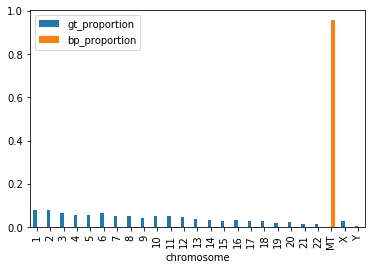

In [23]:
# Graph just the 'gt_proportion' and 'bp_proportion'.
chrom_num[['gt_proportion', 'bp_proportion']].plot(kind='bar');

In [24]:
# Mitochondrial genotypes are ridiculously overrepresented in the data.
# Remove that row and recompute to see how the other chromosomes stacked up.
chrom_num.drop(['MT'], axis=0, inplace=True)
chrom_num['proportion'] = chrom_num['genotype'].divide(chrom_num['million base pairs']).divide(1000000)
chrom_num['gt_proportion'] = chrom_num['genotype'].divide(chrom_num['genotype'].sum())
chrom_num['bp_proportion'] = chrom_num['proportion'].divide(chrom_num['proportion'].sum())
chrom_num.tail()

,genotype,million base pairs,proportion,gt_proportion,bp_proportion
chromosome,,,,,
20,23923,63.0,0.000380,0.024810,0.051544
21,13470,48.0,0.000281,0.013970,0.038092
22,14245,51.0,0.000279,0.014773,0.037914
X,26087,155.0,0.000168,0.027054,0.022845
Y,3483,59.0,0.000059,0.003612,0.008013


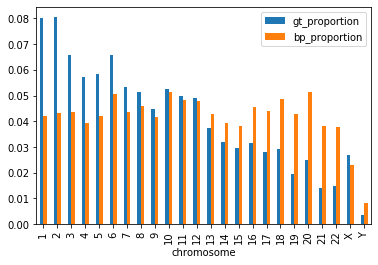

In [25]:
# No regraph the two columns of interest from the DataFrame.
# Genotypes on the lower-numbered chromosomes are far overrepresented a proporition to the size of those chromosomes.
chrom_num[['gt_proportion', 'bp_proportion']].plot(kind='bar');

 - Use the NCBI [Genome Data Viewer](https://www.ncbi.nlm.nih.gov/genome/gdv/) to locate more datasets to investigate (or download via the NCBI [FTP site](https://ftp.ncbi.nlm.nih.gov/)).